<a href="https://colab.research.google.com/github/ahmadalideeb/machine-learning/blob/master/Homework/MMO_DZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1) Текстовое описание набора данных**

В качестве набора данных мы будем использовать набор данных для выявления рака молочной железы
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Датасет содержит следующие колонки:
- **radius** (среднее расстояние от центра до точек по периметру)

- **texture** (стандартное отклонение значений оттенков серого)

- **perimeter**

- **area**

- **smothness** (локальное изменение длины радиуса)

- **compactness** ($\frac{периметр^{2}} {площадь - 1,0}$)

7. **concavity** (выраженность вогнутых участков контура)

8. **concave points** (количество вогнутых частей контура)

9. **symmetry**

10. **fractal dimension** («приближение береговой линии» - 1)

\
Среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее из трех самых больших значений) этих признаков были рассчитаны для каждого изображения, что дало 30 признаков. Например, поле 3 - средний радиус, поле 13 - радиус SE, поле 23 - наихудший радиус.


# Импорт библиотек
Импортируем библиотеки с помощью команды import.
Как правило, все команды import размещают в первой ячейке ноутбука

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import *
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Загрузка данных

Загрузим файлы датасета в помощью sklearn датасет.

In [0]:
cancer = load_breast_cancer()

In [3]:
for x in cancer:
    print(x)

data
target
target_names
DESCR
feature_names
filename


In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer['data'].shape

(569, 30)

In [0]:
data1=pd.DataFrame(data=np.c_[cancer['data'],cancer['target']],
                   columns = list(cancer['feature_names']) + ['target'])

In [7]:
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## **2) Основные характеристики датасета**

In [8]:
# Первые 5 строк датасета
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
# Размер датасета - 8143 строк, 7 колонок
data1.shape

(569, 31)

In [10]:
total_count = data1.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 569


In [11]:
# Список колонок
data1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [12]:
# Список колонок с типами данных
data1.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [13]:
# Проверим наличие пустых значений
# Количество пустых значений - все значения заполнены
data1.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

#**Мы заметили, что все данные имеют тип float64, поэтому нам не нужно делать категориальную кодировку символов. И мы также обращаем внимание, что в данных нет пропусков, поэтому нам не нужно анализировать и заполнять пропуски в данных.**

In [14]:
# Основные статистические характеристки набора данных
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
#Определим уникальные значения для целевого признака
data1['target'].unique()

array([0., 1.])

Целевой признак является бинарным и содержит только значения 0 и 1.

## **3) Визуальное исследование датасета**

Для визуального исследования могут быть использованы различные виды диаграмм, будет сделано только некоторые варианты диаграмм, которые используются достаточно часто.

Будет использовано две библиотеки:
- **Matplotlib**
- **Seaborn**

##  <font color=#1569C7> <u>Диаграмма рассеяния </u> </font>

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

\
<font color='purple'> $\Large \textbf{*Matplotlib*}$ </font>

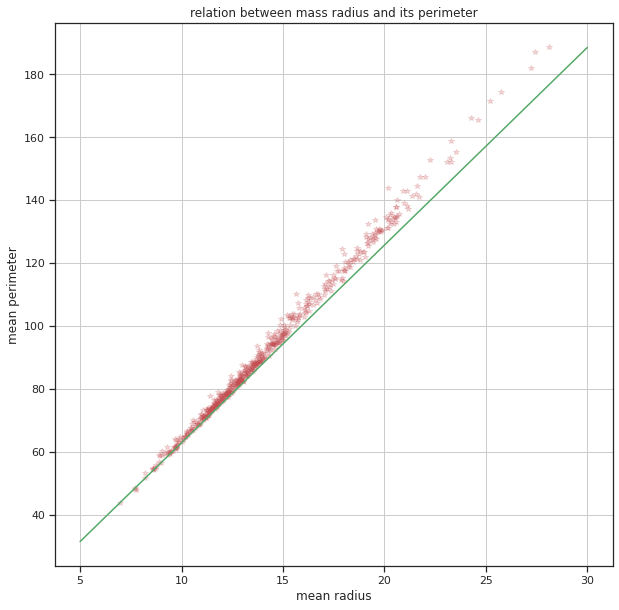

In [16]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
plt.plot(data1['mean radius'],data1['mean perimeter'],'*r',alpha=0.2)
ax.set_xlabel('mean radius')
ax.set_ylabel('mean perimeter')
ax.set_title('relation between mass radius and its perimeter')
xxx=np.linspace(5,30)
yyy=2*np.pi*xxx
plt.plot(xxx,yyy,'g')

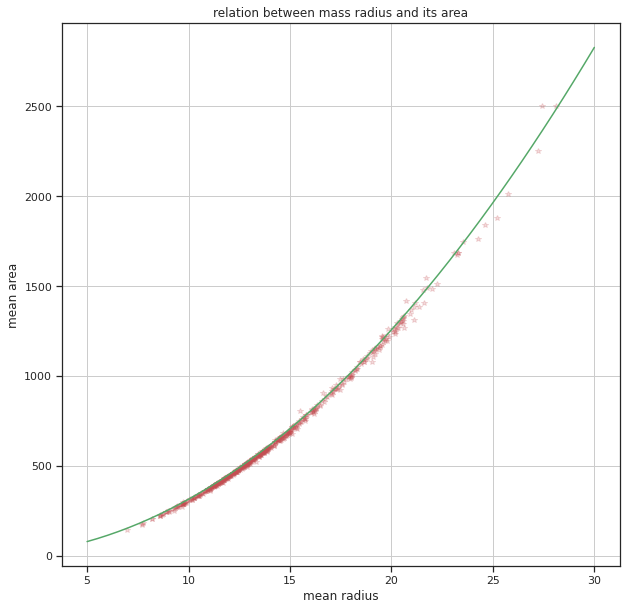

In [17]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
plt.plot(data1['mean radius'],data1['mean area'],'*r',alpha=0.2)
ax.set_xlabel('mean radius')
ax.set_ylabel('mean area')
ax.set_title('relation between mass radius and its area')
xxx=np.linspace(5,30)
yyy=np.pi*xxx**2
plt.plot(xxx,yyy,'g')

\
<font color='purple'> $\Large \textbf{*Seaborn*}$ </font>

Text(0.5, 1.0, 'relation between mass radius and its perimeter')

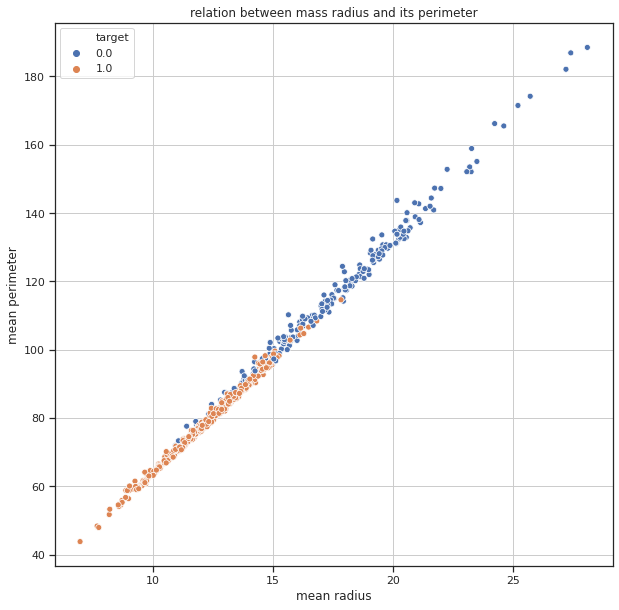

In [18]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
sns.scatterplot(data1['mean radius'],data1['mean perimeter'],color='r',hue=data1['target'])
ax.set_title('relation between mass radius and its perimeter')

Text(0.5, 1.0, 'relation between mass radius and its area')

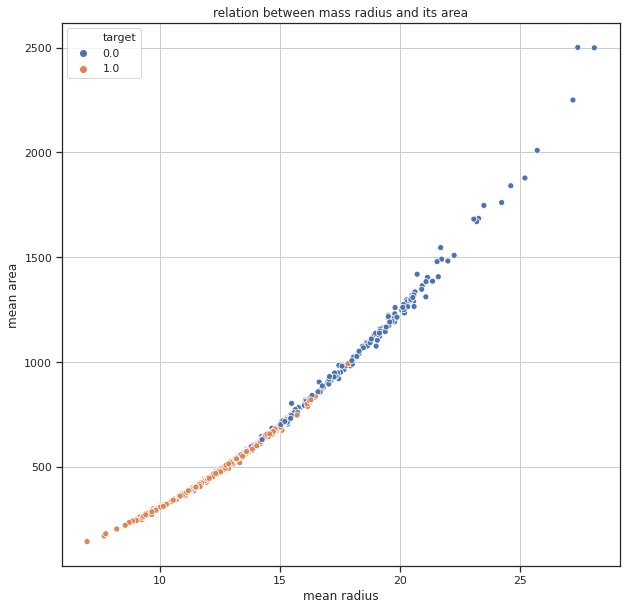

In [19]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
sns.scatterplot(data1['mean radius'],data1['mean area'],color='r',hue=data1['target'])
ax.set_title('relation between mass radius and its area')

Можно видеть что между полями mean radius и mean perimeter пристутствует почти линейная зависимость.\
Можно видеть что между полями mean radius и mean area пристутствует почти параболическая зависимость.

##  <font color=#1569C7> <u>Гистограмма </u> </font>

Позволяет оценить плотность вероятности распределения данных.


\
<font color='purple'> $\Large \textbf{*Matplotlib*}$ </font>

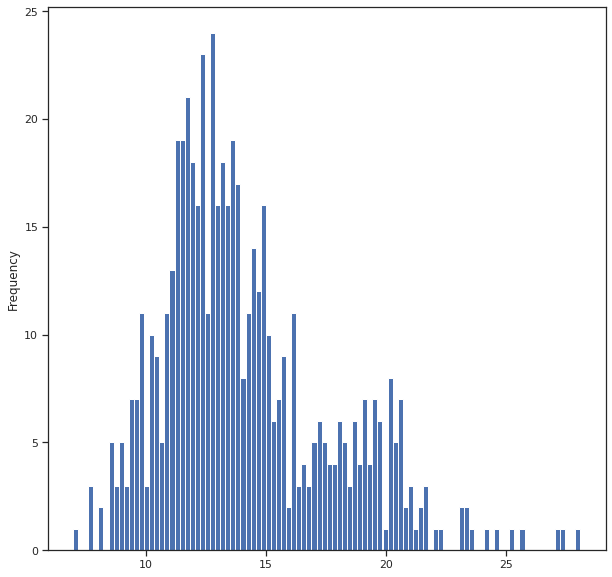

In [20]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
data1['mean radius'].plot.hist(bins=100)

\
<font color='purple'> $\Large \textbf{*Seaborn*}$ </font>

Text(0.5, 1.0, 'график плотности')

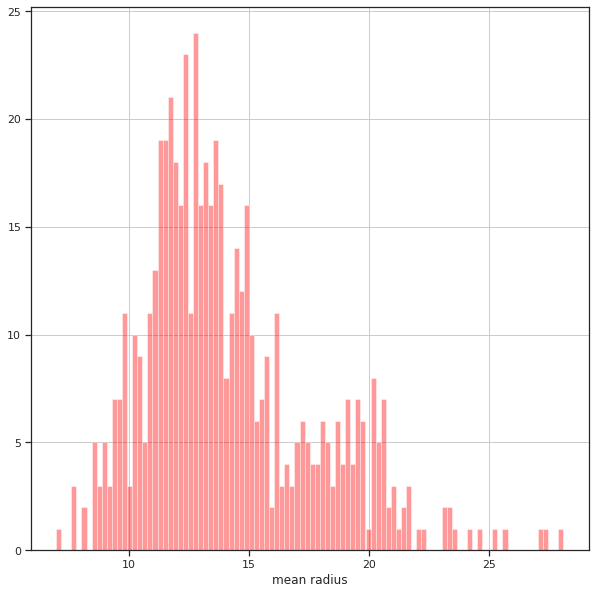

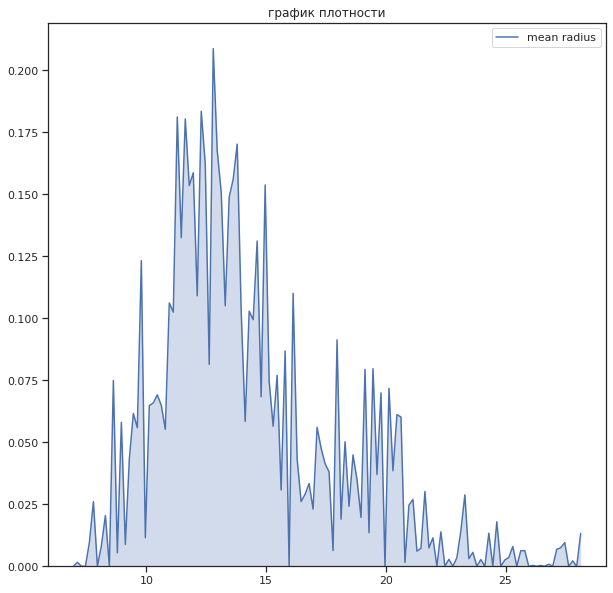

In [21]:
fig=plt.figure(1,figsize=(10,10))
ax=fig.gca()
ax.grid()
sns.distplot(data1['mean radius'],rug=False,kde=False,color='red',bins=100)
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.kdeplot(data1['mean radius'], shade=True,bw=0.01);
ax.set_title('график плотности')

# **Столбчатая диаграмма**

Text(0.5, 1.0, 'Столбчатая диаграмма')

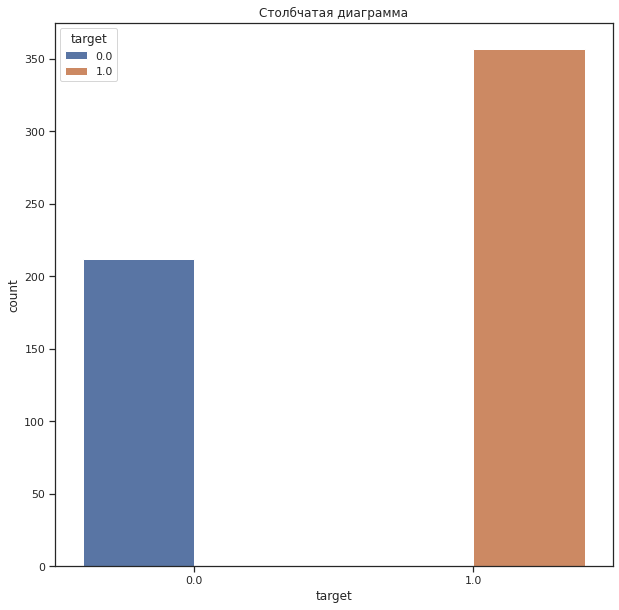

In [22]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.countplot(x=data1['target'],hue=data1['target'])
ax.set_title('Столбчатая диаграмма')

Этот график показывает, когда у человека есть опухоль, какой процент является злокачественным или доброкачественным, независимо от характеристик опухоли.

## **Joinplot**
Комбинация гистограмм и диаграмм рассеивания.

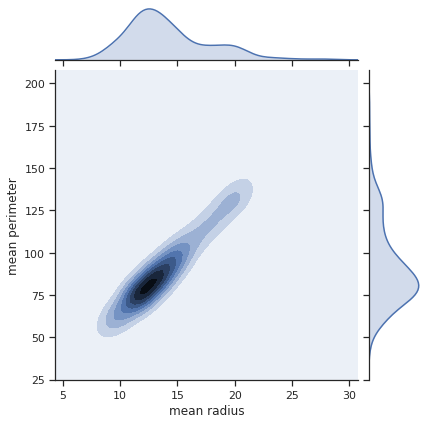

In [23]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='kde')

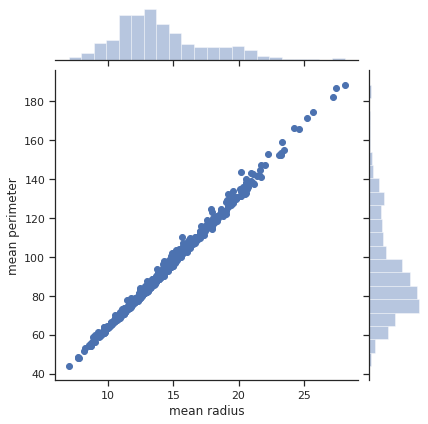

In [24]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='scatter')

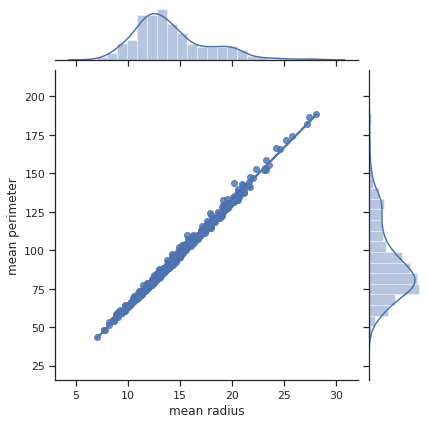

In [25]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='reg')

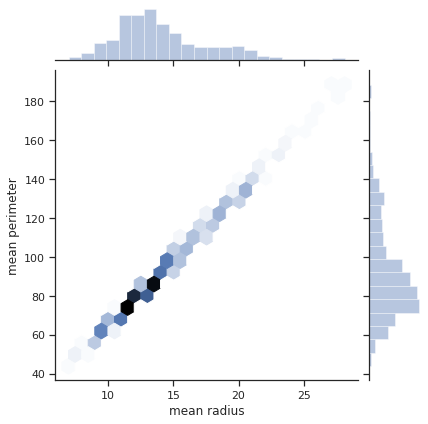

In [26]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='hex')

## **Парные диаграммы**
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

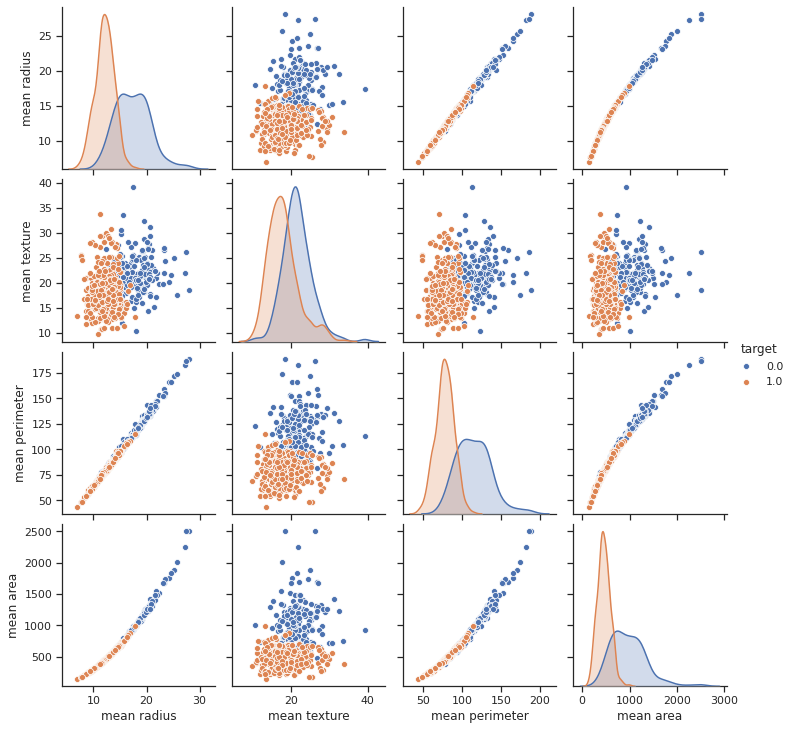

In [27]:
sns.pairplot(data1[['mean radius','mean texture','mean perimeter','mean area','target']],hue="target")

##  <font color=#1569C7> <u>Ящик с усами </u> </font>
Отображает одномерное распределение вероятности.

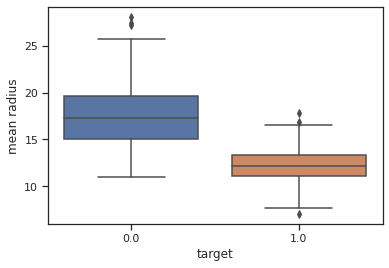

In [28]:
sns.boxplot(x='target', y='mean radius', data=data1)

мы можем видеть, что медиана "mean radius" доброкачественной опухоли меньше, чем медиана злокачественной, и это имеет смысл

##  <font color=#1569C7> <u>Violin plot </u> </font>
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности.

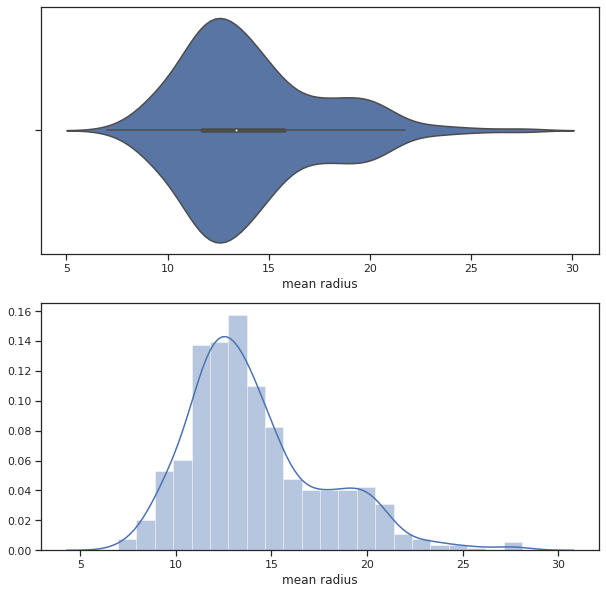

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['mean radius'])
sns.distplot(data1['mean radius'], ax=ax[1])

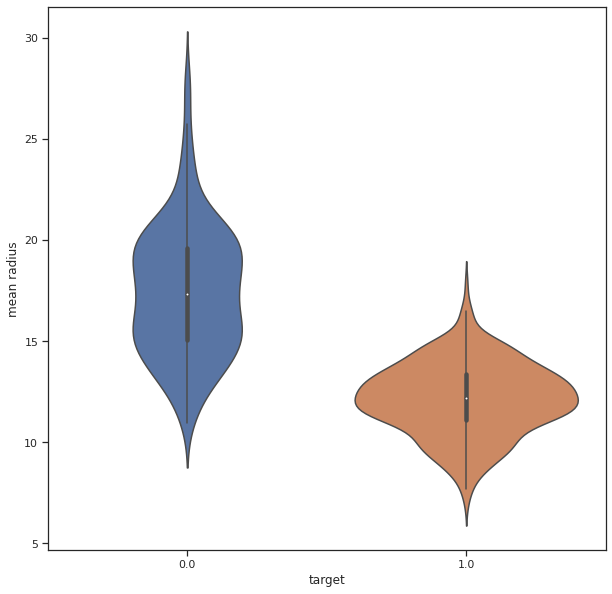

In [30]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.violinplot(x=data1['target'], y=data1['mean radius'], data=data1)

# **4) Информация о корреляции признаков**

In [31]:
data1.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<br><br><br>
В нашем случае набор данных имеет большое количество признаков, поэтому анализ числовой корреляционной матрицы становится неудобным.

Чтобы визуализировать матрицу корреляции, мы будем использовать тепловую карту тепловых карт, которая показывает степень корреляции в разных цветах.

In [0]:
# Числовые колонки для масштабирования
scale_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

In [0]:
sc1 = StandardScaler()
sc1_data = sc1.fit_transform(data1[scale_cols])

In [0]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]

In [0]:
data_scaled=pd.DataFrame(data=np.c_[sc1_data,cancer['target']],
                   columns = scale_cols_postfix + ['target'])

###<u> **Корреляционные матрицы для исходных данных** </u>

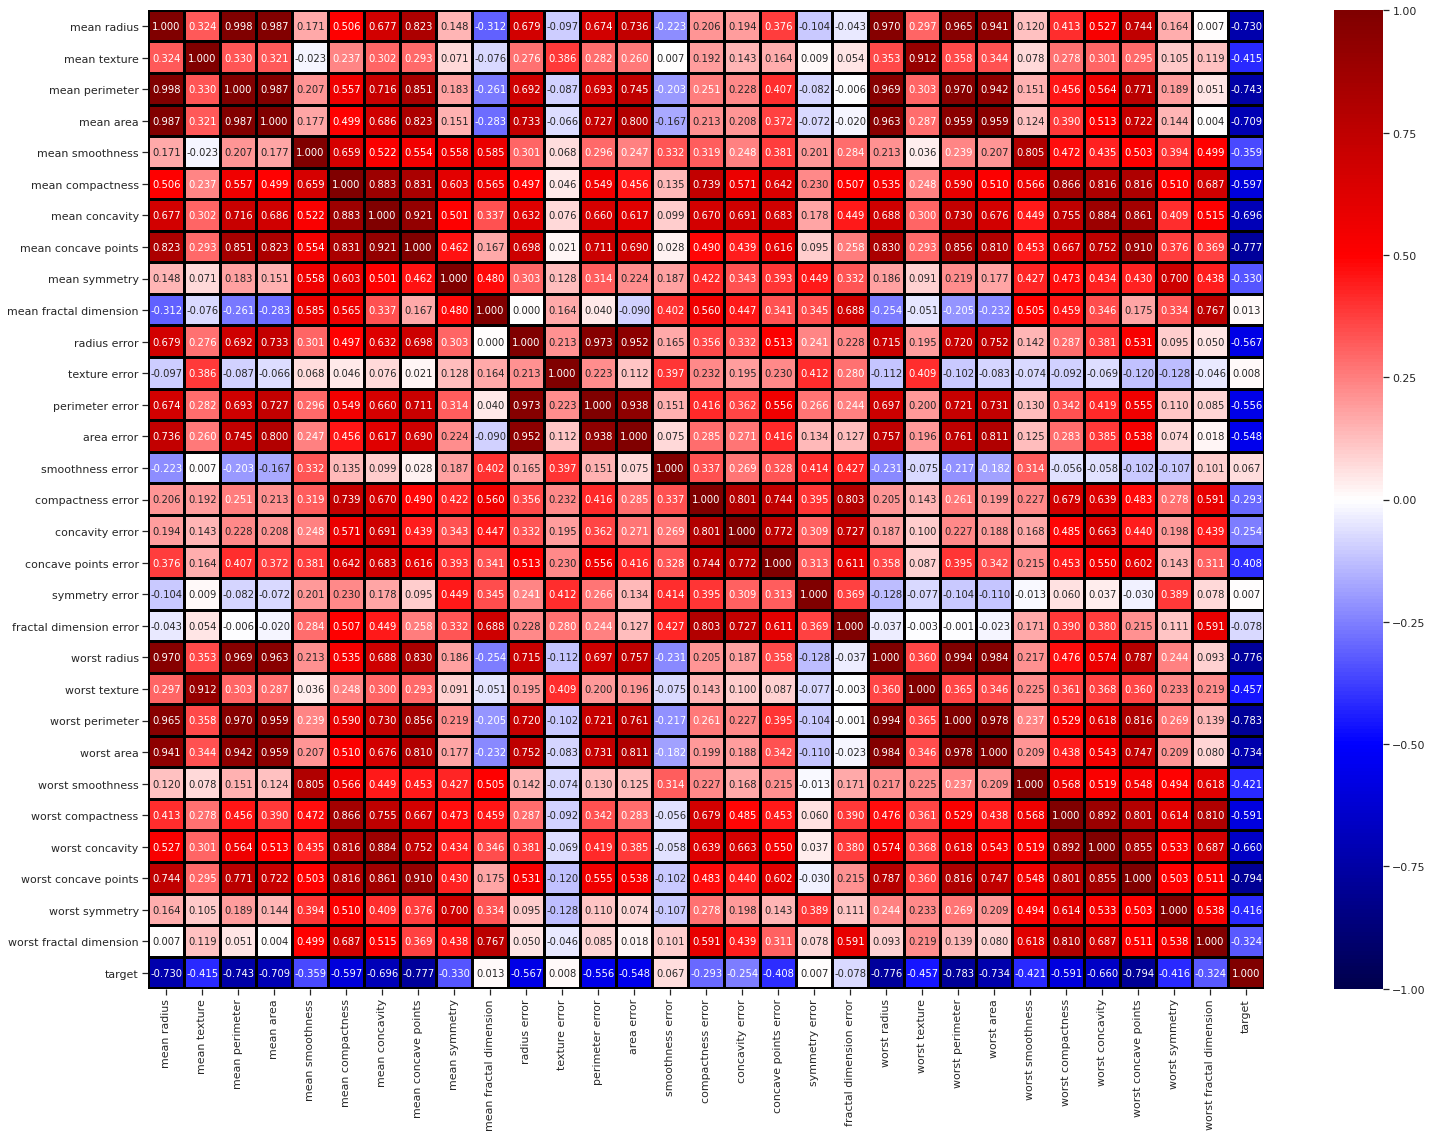

In [36]:
fig=plt.figure(figsize=(25,18))
ax=fig.gca()
sns.heatmap(data1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'seismic', linewidths=2, linecolor='black', fmt='.3f')

###<u> **Корреляционные матрицы для масштабированных данных** </u>

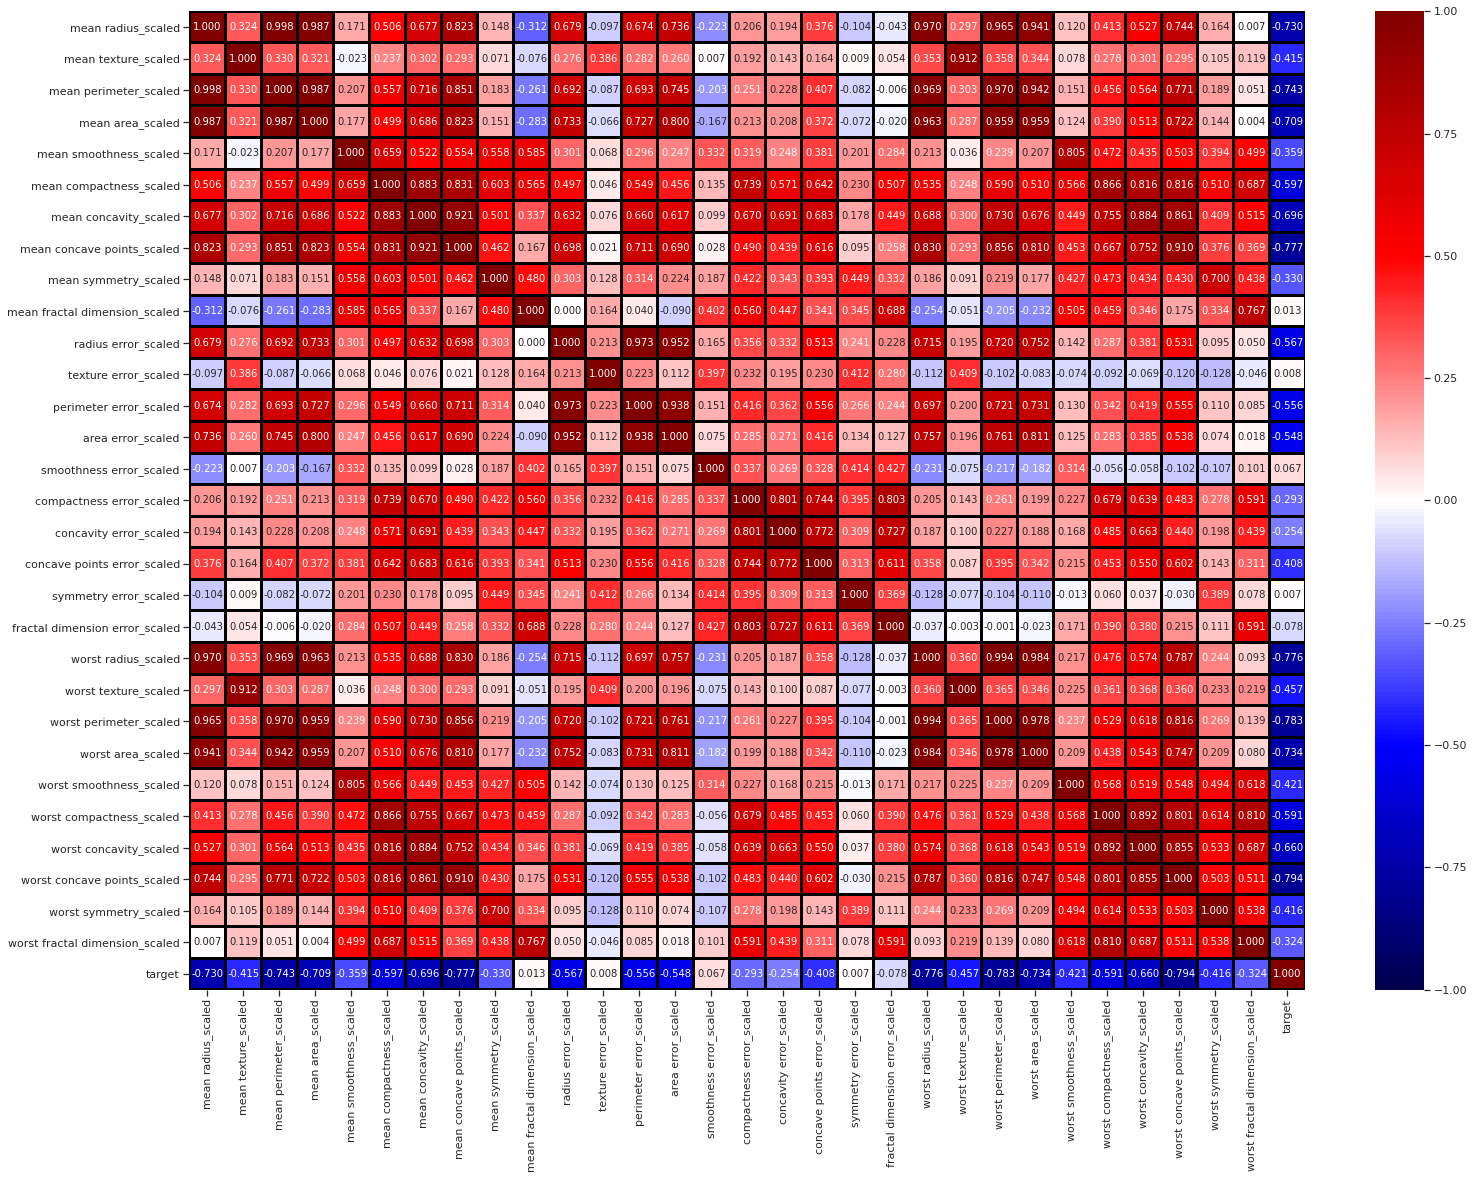

In [37]:
fig=plt.figure(figsize=(25,18))
ax=fig.gca()
sns.heatmap(data_scaled.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'seismic', linewidths=2, linecolor='black', fmt='.3f')

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак наиболее сильно коррелирует с "worst concave points" (-0.794) и "worst perimeter" (-0.783). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с "mean compactness" (-0.597),"radius error" (-0.567),"concave points error" (-0.408) , "worst texture" (-0.547) ,"worst smoothness" (-0.421),"worst symmetry" (-0.416). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с "mean smoothness" (-0.359) , "mean symmetry" (-0.33) , "mean fractal dimension" (0.013) , "texture error" (0.008) , "smothness error" (0.067) , "Compactness error" (-0.293) , "concavity error" (-0.254) , "symmetry error" (0.007) , "fractal dimension error" (-0.078) и "worst fractal dimension" (-0.324). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- "mean radius" и "mean perimeter" очень сильно коррелируют между собой (0.998). Это неудивительно, ведь mean perimeter величина производная от mean radius. Поэтому из этих признаков в модели можно оставлять только один.\
и то же самое между "mean radius" и ("mean area" (0.987), "worst radius" (0.969), "worst perimeter" (0.965), "worst area" (0.941))
- "mean texture" и "worst texture" очень сильно коррелируют между собой (0.912). Это неудивительно, ведь worst texture величина производная от mean texture. Поэтому из этих признаков в модели можно оставлять только один.
- "radius error" и "perimeter error" очень сильно коррелируют между собой (0.973). Это неудивительно, ведь perimeter error величина производная от radius error. Поэтому из этих признаков в модели можно оставлять только один.\
и то же самое между "radius error" и "area error" (0.952)
- "mean concavity" и "worst concave points" очень сильно коррелируют между собой (0.861). Это неудивительно, ведь mean concavity величина производная от worst concave points. Поэтому из этих признаков в модели можно оставлять только один.\
и то же самое между "worst concave points" и ("mean concave points" (0.910), "worst concavity" (0.855))
- "mean compactness" и "worst compactness" очень сильно коррелируют между собой (0.866). Это неудивительно, ведь mean compactness величина производная от worst compactness. Поэтому из этих признаков в модели можно оставлять только один.
- Также можно сделать вывод, что выбирая из признаков ("mean radius","mean perimeter","mean area","worst radius","worst perimeter", "worst area") лучше выбрать "worst perimeter", потому что он сильнее коррелирован с целевым признаком (-0.783). Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.

##**Матрица корреляции после удаления столбцов, которые не имеют большого влияния в модели**

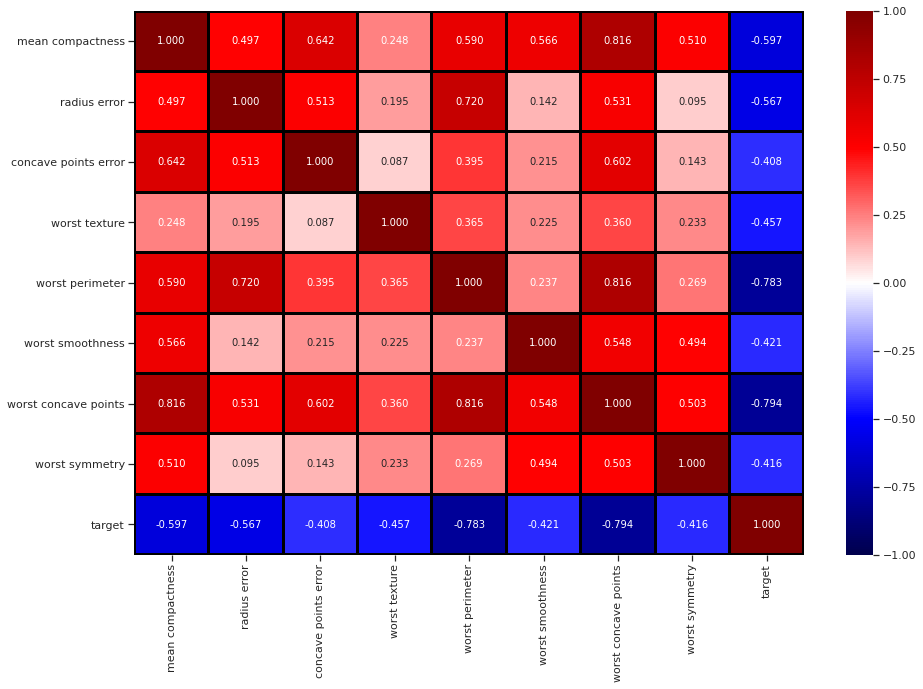

In [38]:
fig=plt.figure(figsize=(15,10))
ax=fig.gca()
sns.heatmap(data1[['mean compactness','radius error','concave points error','worst texture','worst perimeter','worst smoothness','worst concave points','worst symmetry','target']].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'seismic', linewidths=2, linecolor='black', fmt='.3f')

# **4) Выбор метрик для последующей оценки качества моделей**


Мы будем использовать метрику для точности, f1_score, отзыва и roc_auc. И мы увидим кривую roc_auc и значения матрицы путаницы.

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

#**5)Выбор признаков, подходящих для построения моделей.**

Как мы уже говорили, мы будем использовать mean compactness, radius error, concave points error, worst texture, worst perimeter, worst smoothness, worst concave points, и worst symmetry за модель. Все остальные признаки мало связаны с колонкой target.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data1[['mean compactness','radius error','concave points error','worst texture','worst perimeter',
                                                           'worst smoothness','worst concave points','worst symmetry','target']], data1['target'], test_size=0.95, random_state=1)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 9), (541, 9), (28,), (541,))

# **6) Выбор моделей для решения задачи**

Мы выберем многие модели для классификации, а затем сравним их производительность в зависимости от метрики. Поэтому мы будем использовать K-Neighbours Classifier с пятью соседями, классификатор дерева решений, классификатор случайных лесов, классификатор повышения градиента, классификатор мешков, классификатор дополнительных деревьев, классификатор повышения Ada.

In [0]:
clas_models = {'LogR': LogisticRegression(),
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier(),
               'Bag':BaggingClassifier(),
               'ExTree':ExtraTreesClassifier(),
               'Adab':AdaBoostClassifier()}

In [0]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [0]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    
    draw_roc_curve(y_test.values, Y_pred)
    
    plot_confusion_matrix(model,X_test, y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


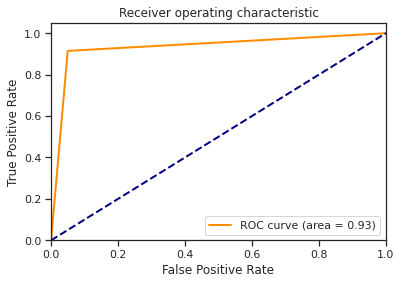

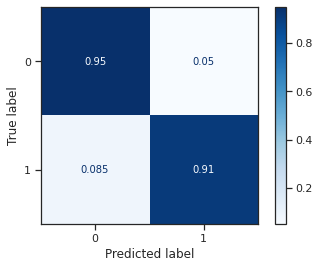

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


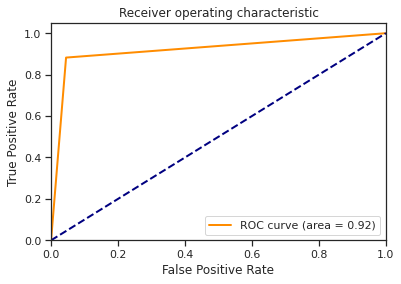

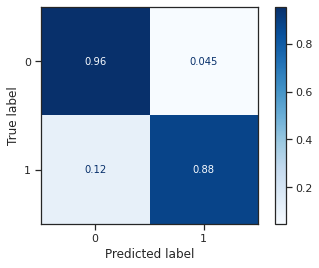

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
*****************************************************


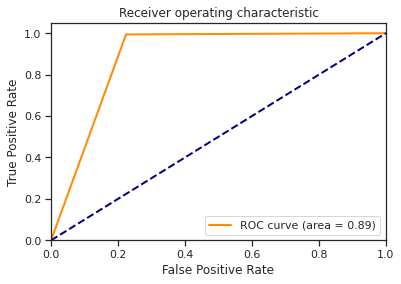

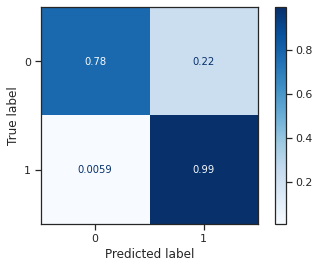

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


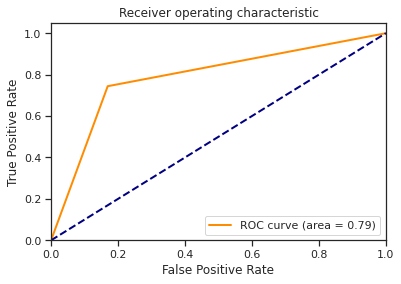

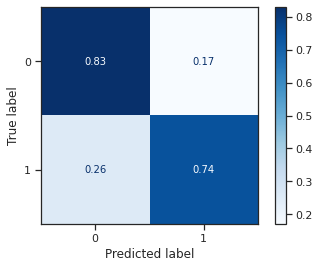

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


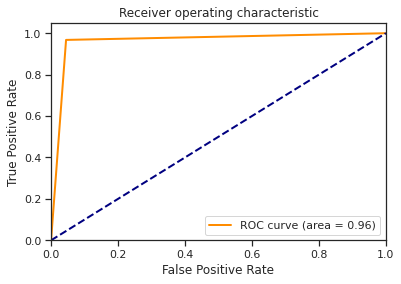

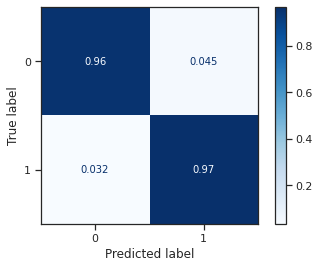

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


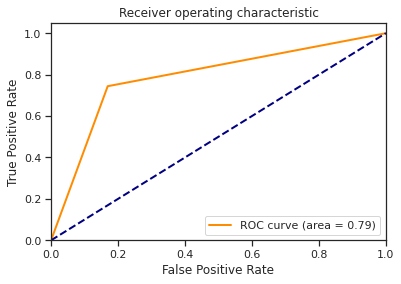

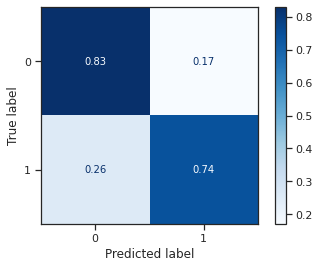

*****************************************************
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
*****************************************************


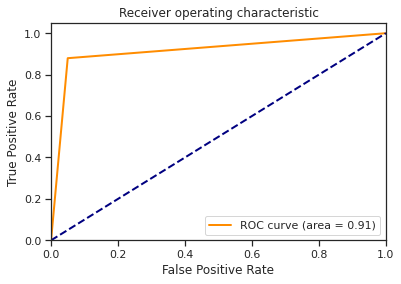

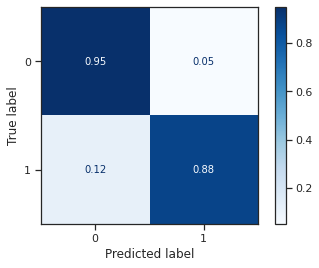

*****************************************************
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
*****************************************************


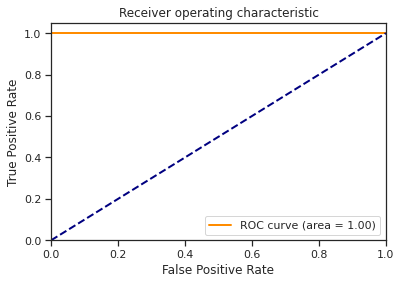

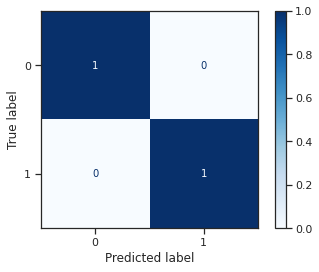

*****************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
*****************************************************


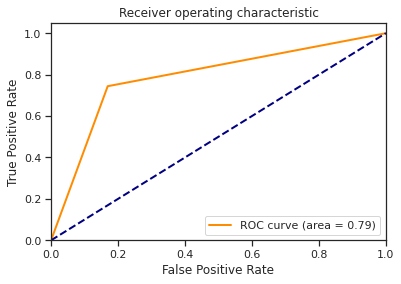

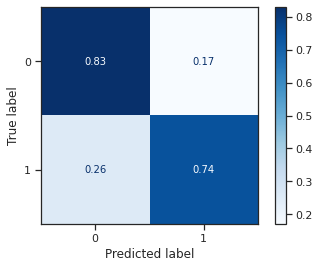

In [46]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

Мы видим, что RandomForestClassifier и ExtraTreesClassifier имеют наилучшую производительность в зависимости от площади кривой ROC. Мы также увидит меру других показателей по всем классификаторам, так что будет легче сравнивать.

In [47]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

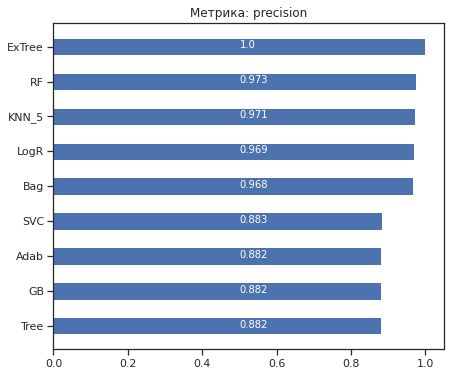

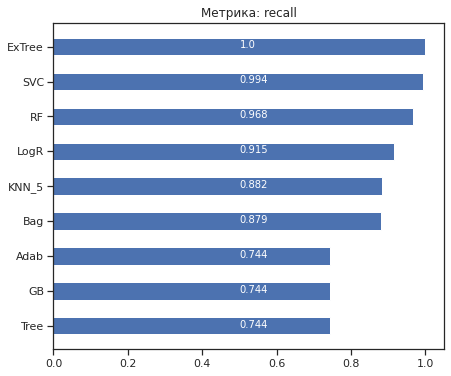

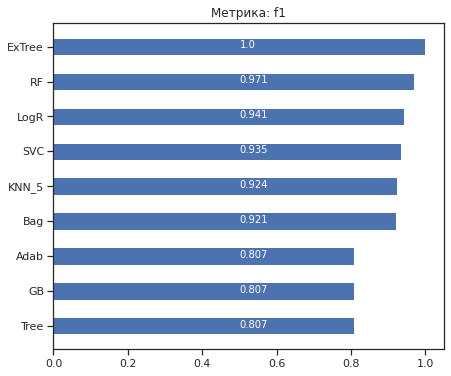

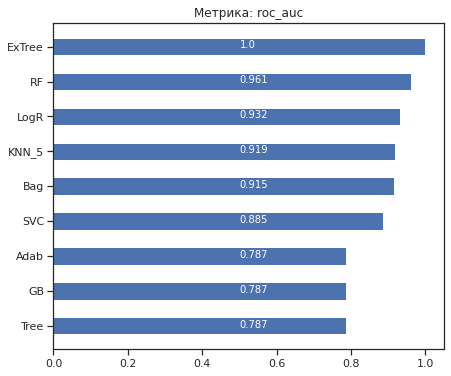

In [48]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

В соответствии с precision: ExtraTreesClassifier имеет наилучшие значения, потом BaggingClassifier, потом RandomForestClassifier.
Согласно recall: ExtraTreesClassifier имеет наилучшие значения, потом SVC, потом RandomForestClassifier.
Согласно метрике «f1-Score»: наилучший результат имеют ExtraTreesClassifier, потом RandomForestClassifier, потом LogisticRegression.

# **7)Подбор гиперпараметров для выбранных моделей.**

Мы будем изменять количество соседей, которое имеет классификатор k-соседей. и увидеть лучшее значение, используя функцию поиска по сетке

In [49]:
n_range = np.array(range(1,22,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21])}]

In [50]:
#%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [51]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00310426, 0.0018362 , 0.00173659, 0.00171471, 0.00211811,
        0.00186629, 0.00178323, 0.00172935, 0.0017169 , 0.00179191,
        0.00165772, 0.00164089, 0.00162826, 0.00163569, 0.00164137,
        0.00168605, 0.00163426, 0.00164008, 0.00164742, 0.0018301 ,
        0.00204983]),
 'mean_score_time': array([0.0036181 , 0.00236197, 0.00221562, 0.00217724, 0.00273938,
        0.00231009, 0.00225224, 0.00219083, 0.00220208, 0.00230036,
        0.00220351, 0.00217261, 0.0021749 , 0.00221562, 0.00223656,
        0.00219994, 0.00216308, 0.00216784, 0.00219531, 0.00236921,
        0.00279932]),
 'mean_test_score': array([1.        , 1.        , 0.9875    , 0.9875    , 0.9875    ,
        0.97638889, 0.97638889, 0.96388889, 0.96388889, 0.96388889,
        0.96388889, 0.975     , 0.975     , 0.9875    , 1.        ,
        0.95      , 0.91666667, 0.86666667, 0.86666667, 0.86666667,
        0.81666667]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8

In [52]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [53]:
clf_gs.best_score_

1.0

In [54]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 1}

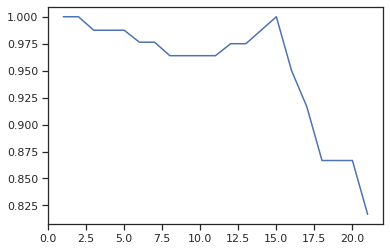

In [55]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [0]:
clas_models_grid = {'KNN_1':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
*****************************************************


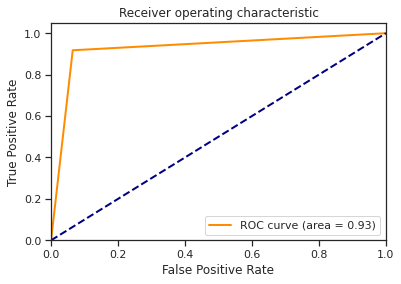

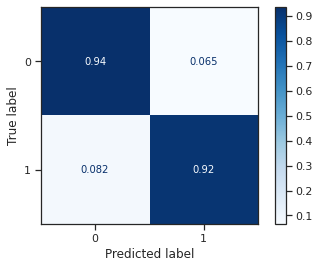

In [57]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = ExtraTreesClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


100.0

# **8)Решение задачи классификации**

Итак, наконец, мы используем классификатор LogisticRegression и видим его производительность по сравнению с нашими тестовыми данными.

*****************************************************
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
*****************************************************


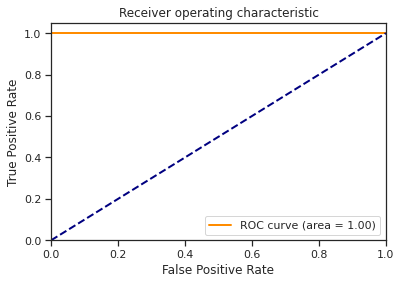

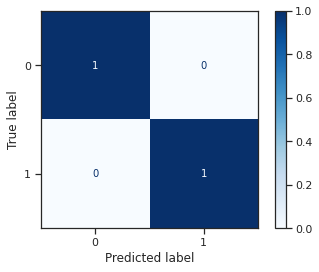

In [59]:
clas_models_grid = {'Tree':ExtraTreesClassifier()}

for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)


# **9)Вывод**
Таким образом, в нашей модели мы хорошо изучили данные и решили, какой из ее столбцов подходит для построения модели (после обработки всего объекта и пропущенных данных из него). Затем мы использовали набор классификаторов и метрик для оценки их работы с нашими данными. Наилучшая производительность была у классификатора ExtraTreesClassifier. Теперь мы можем использовать нашу модель для прогнозирования, у кого рак, а у кого нет, и мы можем доверять нашей модели, потому что она имеет 100% точность и 100% recall.